# Data Manipulation and Linear Regression Tutorial

In this tutorial, we will work with a dataset containing variables such as age, height, degree, and years of experience to predict an individual's salary. The dataset also includes two columns with missing values (NaNs), which will help us understand how to handle missing data.

### Objectives:
1. Explore the dataset and understand its characteristics.
2. Plot distributions and statistics for different variables.
3. Handle missing data and explain the difference between dropping rows and columns with NaNs.
4. Fit a basic linear regression model to predict salary based on the other features.
5. Make predictions and interpret the results.


In [24]:
import pandas as pd

# Load the dataset
df = pd.read_csv('salary_prediction_dataset.csv')

# Display the first few rows
df.head()


,Age,Height,Degree,Experience,Salary,AlmostNaN,SomeNaN
0,60,178,Master,34,83441.143434,NaN,NaN
1,50,166,Master,13,44592.156539,NaN,58.0
2,36,168,PhD,30,51173.229576,NaN,76.0
3,64,169,PhD,6,47017.424640,NaN,76.0
4,29,158,PhD,8,42842.607862,NaN,56.0


### Step 2: Explore the Dataset

Let's first look at the structure and characteristics of the dataset. We'll check for missing values, data types, and basic statistics for numerical columns.


In [25]:
# Check for missing values
df.isnull().sum()

# Check data types
df.info()

# Display basic statistics for numerical columns
df.describe()


Age               0
Height            0
Degree            0
Experience        0
Salary            0
AlmostNaN        80
SomeNaN       99836
dtype: int64

### Step 3: Plot Distributions

We will now plot the distributions of the numeric variables to visualize their spread. This will help us understand the range and distribution of data.


/Users/lovnesh/anaconda3/envs/DL/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lovnesh/anaconda3/envs/DL/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lovnesh/anaconda3/envs/DL/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


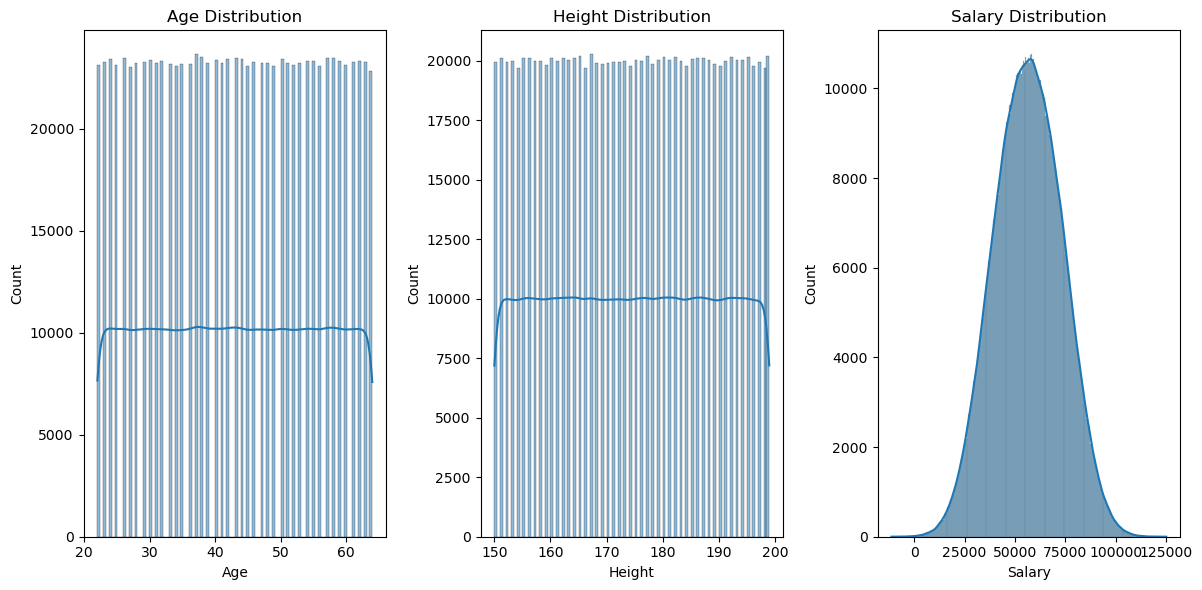

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions for Age, Height, and Salary
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Height'], kde=True)
plt.title('Height Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')

plt.tight_layout()
plt.show()


### Step 4: Handling Missing Data

Our dataset contains missing values (NaNs). We'll explore how to handle them by either dropping rows or columns. We'll compare the impact of each method:
1. Dropping the entire column if it has too many missing values.
2. Dropping only rows with NaNs to preserve the majority of data.


In [27]:
# Check the percentage of missing values in each column
(df.isnull().sum() / len(df)) * 100

df_dropped_column = df.drop(columns=['SomeNaN'])

# Option 2: Drop rows with NaNs
df_dropped_rows = df.dropna()

# Check the shape after dropping
df_dropped_column.shape, df_dropped_rows.shape


((1000000, 6), (900093, 7))

### Step 5: Linear Regression

Now that we have handled missing data, we can proceed to fit a linear regression model to predict salary based on features such as age, height, degree, and experience. We'll start by encoding categorical variables and then fit the model.


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Drop rows with NaNs for simplicity
df_clean = df.drop(columns=['SomeNaN']).dropna()

# One-hot encode the 'Degree' column
encoder = OneHotEncoder(drop='first', sparse=False)
degree_encoded = encoder.fit_transform(df_clean[['Degree']])

# Create a DataFrame for the encoded degree
degree_df = pd.DataFrame(
    degree_encoded, columns=encoder.get_feature_names_out(['Degree']))

# Combine with the original data
df_clean_encoded = pd.concat(
    [df_clean.drop(columns=['Degree']), degree_df], axis=1)

# Define features and target variable
X = df_clean_encoded.drop(columns=['Salary'])
y = df_clean_encoded['Salary']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

/Users/lovnesh/anaconda3/envs/DL/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [21]:
X_train.dropna()

,Age,Height,Experience,AlmostNaN,Degree_Master,Degree_PhD
566933,53.0,154.0,38.0,69.0,0.0,1.0
382391,28.0,160.0,25.0,57.0,1.0,0.0
241599,35.0,186.0,26.0,72.0,0.0,1.0
719300,25.0,158.0,19.0,69.0,0.0,0.0
905798,62.0,155.0,9.0,90.0,0.0,1.0
...,...,...,...,...,...,...
259258,62.0,168.0,17.0,54.0,0.0,1.0
365918,37.0,189.0,7.0,77.0,0.0,1.0
132012,56.0,199.0,38.0,63.0,0.0,1.0
671235,30.0,167.0,1.0,57.0,0.0,0.0


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Drop rows with NaNs for simplicity
df_clean = df.drop(columns=['SomeNaN']).dropna()

# One-hot encode the 'Degree' column
encoder = OneHotEncoder(drop='first', sparse=False)
degree_encoded = encoder.fit_transform(df_clean[['Degree']])

# Create a DataFrame for the encoded degree
degree_df = pd.DataFrame(degree_encoded, columns=encoder.get_feature_names_out(['Degree']))

# Combine with the original data
df_clean_encoded = pd.concat([df_clean.drop(columns=['Degree']), degree_df], axis=1).dropna()

# Define features and target variable
X = df_clean_encoded.drop(columns=['Salary'])
y = df_clean_encoded['Salary']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
model.score(X_test, y_test)

/Users/lovnesh/anaconda3/envs/DL/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.5884573591698521

In [44]:
X_test[:1]

,Age,Height,Experience,AlmostNaN,Degree_Master,Degree_PhD
332982,34.0,166.0,23.0,84.0,1.0,0.0


In [43]:
model.predict(X_test[:1])

array([55009.37091259])

### Conclusion

In this tutorial, we have:
1. Explored a dataset with different features, including handling missing data.
2. Visualized the distributions of important variables.
3. Fit a basic linear regression model to predict salary based on age, height, degree, and experience.
4. Discussed the impact of handling missing data on the model and its performance.

This tutorial is a great starting point to further explore machine learning models and data science techniques. Stay curious and keep learning!
